In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.interpolate as scin

### Variables

#### Время наработки на отказ MTBF (t)

In [2]:
# Router MTBF
r = 365000

# Distribution layer switch MTBF
sd = 300000

# Access layer switch MTBF
sw = 520000

# Fiber optic MTBF
fo = 100000

# Twisted pair MTBF
tp = 219000

#### Вероятность безотказной работы элемента за период 0.5, 1, 3 года (T)

In [3]:
T05 = 24/2*365
T1 = 24*365
T3 = 24*365*3

print(f'Количество часов в 0,5 года: {T05:n}')
print(f'Количество часов в 1 годе: {T1}')
print(f'Количество часов в 3 годах: {T3}')

Количество часов в 0,5 года: 4380
Количество часов в 1 годе: 8760
Количество часов в 3 годах: 26280


In [4]:
# 0.5 лет
r05 = np.e**(-T05/r)
sd05 = np.e**(-T05/sd)
sw05 = np.e**(-T05/sw)
fo05 = np.e**(-T05/fo)
tp05 = np.e**(-T05/tp)

# print
print(f'Вероятность безотказной работы за 0,5 года:')
print(f'Роутер: {r05:.6f}')
print(f'Коммутатор уровня распределения: {sd05:.6f}')
print(f'Коммутатор уровня доступа: {sw05:.6f}')
print(f'Оптоволоконный кабель: {fo05:.6f}')
print(f'Витая пара: {tp05:.6f}')

Вероятность безотказной работы за 0,5 года:
Роутер: 0.988072
Коммутатор уровня распределения: 0.985506
Коммутатор уровня доступа: 0.991612
Оптоволоконный кабель: 0.957145
Витая пара: 0.980199


In [5]:
# 1 год
r1 = np.e**(-T1/r)
sd1 = np.e**(-T1/sd)
sw1 = np.e**(-T1/sw)
fo1 = np.e**(-T1/fo)
tp1 = np.e**(-T1/tp)

# print
print(f'Вероятность безотказной работы за 1 год:')
print(f'Роутер: {r1:.6f}')
print(f'Коммутатор уровня распределения: {sd1:.6f}')
print(f'Коммутатор уровня доступа: {sw1:.6f}')
print(f'Оптоволоконный кабель: {fo1:.6f}')
print(f'Витая пара: {tp1:.6f}')

Вероятность безотказной работы за 1 год:
Роутер: 0.976286
Коммутатор уровня распределения: 0.971222
Коммутатор уровня доступа: 0.983295
Оптоволоконный кабель: 0.916127
Витая пара: 0.960789


In [6]:
# 3 года
r3 = np.e**(-T3/r)
sd3 = np.e**(-T3/sd)
sw3 = np.e**(-T3/sw)
fo3 = np.e**(-T3/fo)
tp3 = np.e**(-T3/tp)

# print
print(f'Вероятность безотказной работы за 3 года:')
print(f'Роутер: {r3:.6f}')
print(f'Коммутатор уровня распределения: {sd3:.6f}')
print(f'Коммутатор уровня доступа: {sw3:.6f}')
print(f'Оптоволоконный кабель: {fo3:.6f}')
print(f'Витая пара: {tp3:.6f}')

Вероятность безотказной работы за 3 года:
Роутер: 0.930531
Коммутатор уровня распределения: 0.916127
Коммутатор уровня доступа: 0.950717
Оптоволоконный кабель: 0.768896
Витая пара: 0.886920


#### Метод статистического моделирования

In [7]:
# Получение значения работоспособности (true/false) для каждого элемента сети на основе заданных вероятностей
def psample(rp, sdp, swp, fop, tpp):
    result = []
    result.append(None)
    rn = rnd.random(size=68)

    for r in range(68):
        # Router
        if r == 0:
            if rn[r] <= rp:
                result.append(True)
            else:
                result.append(False)
        # Distribution layer switches
        elif r == 1 or r == 2:
            if rn[r] <= sdp:
                result.append(True)
            else:
                result.append(False)
        # Access layer switches
        elif r >= 3 and r <= 7:
            if rn[r] <= swp:
                result.append(True)
            else:
                result.append(False)
        # Fiber optic cable
        elif r >= 8 and r <= 11:
            if rn[r] <= fop:
                result.append(True)
            else:
                result.append(False)
        # Twisted pair cable
        elif r >= 12:
            if rn[r] <= tpp:
                result.append(True)
            else:
                result.append(False)
    return result

In [8]:
# # Расчет работоспособности всей сети на основе работоспособности отдельных элементов сети
# def f(x):
#     x12 = x[1] and x[9] and x[2]
#     x13 = x[1] and x[10] and x[3]
#     x14 = x[1] and ( (x[9] and x[2] and x[13]) or (x[9] and x[2] and x[12] and x[3] and x[14]) or (x[10] and x[3] and x[14]) or (x[10] and x[3] and x[12] and x[2] and x[13]) ) and x[4]
#     x15 = x[1] and ( (x[9] and x[2] and x[15]) or (x[9] and x[2] and x[12] and x[3] and x[16]) or (x[10] and x[3] and x[16]) or (x[10] and x[3] and x[12] and x[2] and x[15]) ) and x[5]
#     x16 = x[1] and ( (x[9] and x[2] and x[17]) or (x[9] and x[2] and x[12] and x[3] and x[18]) or (x[10] and x[3] and x[18]) or (x[10] and x[3] and x[12] and x[2] and x[17]) ) and x[6]
#     x17 = x[1] and ( (x[9] and x[2] and x[19]) or (x[9] and x[2] and x[12] and x[3] and x[20]) or (x[10] and x[3] and x[20]) or (x[10] and x[3] and x[12] and x[2] and x[19]) ) and x[7]
#     x18 = x[1] and ( (x[9] and x[2] and x[21]) or (x[9] and x[2] and x[12] and x[3] and x[22]) or (x[10] and x[3] and x[22]) or (x[10] and x[3] and x[12] and x[2] and x[21]) ) and x[8]

#     x23 = x[2] and x[12] and x[3]
#     x24 = x[2] and ( x[13] or (x[12] and x[3] and x[14]) ) and x[4]
#     x25 = x[2] and ( x[15] or (x[12] and x[3] and x[16]) ) and x[5]
#     x26 = x[2] and ( x[17] or (x[12] and x[3] and x[18]) ) and x[6]
#     x27 = x[2] and ( x[19] or (x[12] and x[3] and x[20]) ) and x[7]
#     x28 = x[2] and ( x[21] or (x[12] and x[3] and x[22]) ) and x[8]

#     x34 = x[3] and ( x[14] or (x[12] and x[2] and x[13]) ) and x[4]
#     x35 = x[3] and ( x[16] or (x[12] and x[2] and x[15]) ) and x[5]
#     x36 = x[3] and ( x[18] or (x[12] and x[2] and x[17]) ) and x[6]
#     x37 = x[3] and ( x[20] or (x[12] and x[2] and x[19]) ) and x[7]
#     x38 = x[3] and ( x[22] or (x[12] and x[2] and x[21]) ) and x[8]

#     x45 = x[4] and ( (x[13] and x[2] and x[15]) or (x[13] and x[2] and x[12] and x[3] and x[16]) or (x[14] and x[3] and x[16]) or (x[14] and x[3] and x[12] and x[2] and x[15]) ) and x[5]
#     x46 = x[4] and ( (x[13] and x[2] and x[17]) or (x[13] and x[2] and x[12] and x[3] and x[18]) or (x[14] and x[3] and x[18]) or (x[14] and x[3] and x[12] and x[2] and x[17]) ) and x[6]
#     x47 = x[4] and ( (x[13] and x[2] and x[19]) or (x[13] and x[2] and x[12] and x[3] and x[20]) or (x[14] and x[3] and x[20]) or (x[14] and x[3] and x[12] and x[2] and x[19]) ) and x[7]
#     x48 = x[4] and ( (x[13] and x[2] and x[21]) or (x[13] and x[2] and x[12] and x[3] and x[22]) or (x[14] and x[3] and x[22]) or (x[14] and x[3] and x[12] and x[2] and x[21]) ) and x[8]

#     x56 = x[5] and ( (x[15] and x[2] and x[17]) or (x[15] and x[2] and x[12] and x[3] and x[18]) or (x[16] and x[3] and x[18]) or (x[16] and x[3] and x[12] and x[2] and x[17]) ) and x[6]
#     x57 = x[5] and ( (x[15] and x[2] and x[19]) or (x[15] and x[2] and x[12] and x[3] and x[20]) or (x[16] and x[3] and x[20]) or (x[16] and x[3] and x[12] and x[2] and x[19]) ) and x[7]
#     x58 = x[5] and ( (x[15] and x[2] and x[21]) or (x[15] and x[2] and x[12] and x[3] and x[22]) or (x[16] and x[3] and x[22]) or (x[16] and x[3] and x[12] and x[2] and x[21]) ) and x[8]
    
#     x67 = x[6] and ( (x[17] and x[2] and x[19]) or (x[17] and x[2] and x[12] and x[3] and x[20]) or (x[18] and x[3] and x[20]) or (x[18] and x[3] and x[12] and x[2] and x[19]) ) and x[7]
#     x68 = x[6] and ( (x[17] and x[2] and x[21]) or (x[17] and x[2] and x[12] and x[3] and x[22]) or (x[18] and x[3] and x[22]) or (x[18] and x[3] and x[12] and x[2] and x[21]) ) and x[8]

#     x78 = x[6] and ( (x[19] and x[2] and x[21]) or (x[19] and x[2] and x[12] and x[3] and x[22]) or (x[20] and x[3] and x[22]) or (x[20] and x[3] and x[12] and x[2] and x[21]) ) and x[8]

#     srv1 = x[11]

#     x100 = x[23] and x[24] and x[25] and x[26] and x[27] and x[28] and x[29] and x[30] and x[31]
#     x200 = x[32] and x[33] and x[34] and x[35] and x[36] and x[37] and x[38] and x[39]
#     x400 = x[40] and x[41] and x[42] and x[43] and x[44] and x[45] and x[46] and x[47] and x[48] and x[49] and x[50]
#     x600 = x[51] and x[52] and x[53] and x[54] and x[55] and x[56] and x[57] and x[58] and x[59] and x[60] and x[61] and x[62]
#     x700 = x[63] and x[64] and x[65] and x[66] and x[67] and x[68]

#     result = x12 and x13 and x14 and x15 and x16 and x17 and x18 and \
#              x23 and x24 and x25 and x26 and x27 and x28 and \
#              x34 and x35 and x36 and x37 and x38 and \
#              x45 and x46 and x47 and x48 and \
#              x56 and x57 and x58 and \
#              x67 and x68 and \
#              x78 and \
#              srv1 and \
#              x100 and x200 and x400 and x600 and x700
    
#     return result

In [9]:
# Расчет работоспособности всей сети на основе работоспособности отдельных элементов сети
def f(x):
    x12 = x[9] or (x[10] and x[3] and x[12])
    x13 = x[10] or (x[9] and x[2] and x[12])
    x14 = (x[9] and x[2] and x[13]) or (x[9] and x[2] and x[12] and x[3] and x[14]) or (x[10] and x[3] and x[14]) or (x[10] and x[3] and x[12] and x[2] and x[13])
    x15 = (x[9] and x[2] and x[15]) or (x[9] and x[2] and x[12] and x[3] and x[16]) or (x[10] and x[3] and x[16]) or (x[10] and x[3] and x[12] and x[2] and x[15])
    x16 = (x[9] and x[2] and x[17]) or (x[9] and x[2] and x[12] and x[3] and x[18]) or (x[10] and x[3] and x[18]) or (x[10] and x[3] and x[12] and x[2] and x[17])
    x17 = (x[9] and x[2] and x[19]) or (x[9] and x[2] and x[12] and x[3] and x[20]) or (x[10] and x[3] and x[20]) or (x[10] and x[3] and x[12] and x[2] and x[19])
    x18 = (x[9] and x[2] and x[21]) or (x[9] and x[2] and x[12] and x[3] and x[22]) or (x[10] and x[3] and x[22]) or (x[10] and x[3] and x[12] and x[2] and x[21])

    x23 = x[12] or (x[13] and x[4] and x[14]) or (x[15] and x[5] and x[16]) or (x[17] and x[6] and x[18]) or (x[19] and x[7] and x[20]) or (x[21] and x[8] and x[22])
    x24 = x[13] or (x[12] and x[3] and x[14])
    x25 = x[15] or (x[12] and x[3] and x[16])
    x26 = x[17] or (x[12] and x[3] and x[18])
    x27 = x[19] or (x[12] and x[3] and x[20])
    x28 = x[21] or (x[12] and x[3] and x[22])

    x34 = x[14] or (x[12] and x[2] and x[13])
    x35 = x[16] or (x[12] and x[2] and x[15])
    x36 = x[18] or (x[12] and x[2] and x[17])
    x37 = x[20] or (x[12] and x[2] and x[19])
    x38 = x[22] or (x[12] and x[2] and x[21])

    x45 = (x[13] and x[2] and x[15]) or (x[13] and x[2] and x[12] and x[3] and x[16]) or (x[14] and x[3] and x[16]) or (x[14] and x[3] and x[12] and x[2] and x[15])
    x46 = (x[13] and x[2] and x[17]) or (x[13] and x[2] and x[12] and x[3] and x[18]) or (x[14] and x[3] and x[18]) or (x[14] and x[3] and x[12] and x[2] and x[17])
    x47 = (x[13] and x[2] and x[19]) or (x[13] and x[2] and x[12] and x[3] and x[20]) or (x[14] and x[3] and x[20]) or (x[14] and x[3] and x[12] and x[2] and x[19])
    x48 = (x[13] and x[2] and x[21]) or (x[13] and x[2] and x[12] and x[3] and x[22]) or (x[14] and x[3] and x[22]) or (x[14] and x[3] and x[12] and x[2] and x[21])

    x56 = (x[15] and x[2] and x[17]) or (x[15] and x[2] and x[12] and x[3] and x[18]) or (x[16] and x[3] and x[18]) or (x[16] and x[3] and x[12] and x[2] and x[17])
    x57 = (x[15] and x[2] and x[19]) or (x[15] and x[2] and x[12] and x[3] and x[20]) or (x[16] and x[3] and x[20]) or (x[16] and x[3] and x[12] and x[2] and x[19])
    x58 = (x[15] and x[2] and x[21]) or (x[15] and x[2] and x[12] and x[3] and x[22]) or (x[16] and x[3] and x[22]) or (x[16] and x[3] and x[12] and x[2] and x[21])
    
    x67 = (x[17] and x[2] and x[19]) or (x[17] and x[2] and x[12] and x[3] and x[20]) or (x[18] and x[3] and x[20]) or (x[18] and x[3] and x[12] and x[2] and x[19])
    x68 = (x[17] and x[2] and x[21]) or (x[17] and x[2] and x[12] and x[3] and x[22]) or (x[18] and x[3] and x[22]) or (x[18] and x[3] and x[12] and x[2] and x[21])

    x78 = (x[19] and x[2] and x[21]) or (x[19] and x[2] and x[12] and x[3] and x[22]) or (x[20] and x[3] and x[22]) or (x[20] and x[3] and x[12] and x[2] and x[21])

    srv1 = x[11] and x[1]

    x100 = x[4] and x[23] and x[24] and x[25] and x[26] and x[27] and x[28] and x[29] and x[30] and x[31]
    x200 = x[5] and x[32] and x[33] and x[34] and x[35] and x[36] and x[37] and x[38] and x[39]
    x400 = x[6] and x[40] and x[41] and x[42] and x[43] and x[44] and x[45] and x[46] and x[47] and x[48] and x[49] and x[50]
    x600 = x[7] and x[51] and x[52] and x[53] and x[54] and x[55] and x[56] and x[57] and x[58] and x[59] and x[60] and x[61] and x[62]
    x700 = x[8] and x[63] and x[64] and x[65] and x[66] and x[67] and x[68]

    result = x12 and x13 and x14 and x15 and x16 and x17 and x18 and \
             x23 and x24 and x25 and x26 and x27 and x28 and \
             x34 and x35 and x36 and x37 and x38 and \
             x45 and x46 and x47 and x48 and \
             x56 and x57 and x58 and \
             x67 and x68 and \
             x78 and \
             srv1 and \
             x100 and x200 and x400 and x600 and x700
    
    return result

In [10]:
def reliability(n, rp, sdp, swp, fop, tpp):
    tcount = 0
    for _ in range(n):
        x = psample(rp=rp, sdp=sdp, swp=swp, fop=fop, tpp=tpp)
        if (f(x)):
            tcount += 1
    p = tcount/n
    e = np.cbrt(p*(1-p)/n)
    return p,e

In [11]:
p05, e05 = reliability(n=1000000, rp=r05, sdp=sd05, swp=sw05, fop=fo05, tpp=tp05)
p1, e1 = reliability(n=1000000, rp=r1, sdp=sd1, swp=sw1, fop=fo1, tpp=tp1)
p3, e3 = reliability(n=1000000, rp=r3, sdp=sd3, swp=sw3, fop=fo3, tpp=tp3)

print(f'Статистическая оценка вероятности безотказной работы для 0,5 года: {p05}')
print(f'Погрешность: {e05}')
print(f'\nСтатистическая оценка вероятности безотказной работы для 1 года: {p1}')
print(f'Погрешность: {e1}')
print(f'\nСтатистическая оценка вероятности безотказной работы для 3 лет: {p3}')
print(f'Погрешность: {e3}')

Статистическая оценка вероятности безотказной работы для 0,5 года: 0.355431
Погрешность: 0.0061189218436125

Статистическая оценка вероятности безотказной работы для 1 года: 0.12216
Погрешность: 0.0047509609786079285

Статистическая оценка вероятности безотказной работы для 3 лет: 0.00148
Погрешность: 0.0011390413609159134


#### Метод минимальных путей и минимальных сечений

In [12]:
def createprlist(rp, sdp, swp, fop, tpp):
    pr = []
    pr.append(None)

    pr.append(rp)

    for _ in range(2):
        pr.append(sdp)

    for _ in range(5):
        pr.append(swp)

    for _ in range(4):
        pr.append(fop)

    for _ in range(13, 69):
        pr.append(tpp)

    return pr

In [13]:
def minpath(x):
    def cut(xxs):
        res = 1
        for xx in xxs:
            res = res * (1-xx)
        return 1 - res

    p = []

    # 1-2
    p.append(cut([x[9],x[10]]) * cut([x[9],x[3]]) * cut([x[9],x[12]]))

    # 1-4
    p.append(cut([x[2],x[3]]) * cut([x[9],x[10]]) * cut([x[13],x[14]]) * cut([x[3],x[13]]) * cut([x[2],x[14]]) * cut([x[3],x[9]]) * cut([x[2],x[10]]) * cut([x[10],x[12],x[13]]) * cut([x[9],x[12],x[14]]))
    
    # 1-Srv1
    p.append(cut([x[11]]))

    # 1-101
    p.append(cut([x[2],x[3]]) * cut([x[9],x[10]]) * cut([x[13],x[14]]) * cut([x[3],x[13]]) * cut([x[2],x[14]]) * cut([x[3],x[9]]) * cut([x[2],x[10]]) * cut([x[10],x[12],x[13]]) * cut([x[9],x[12],x[14]]) * cut([x[23]]))

    # 2-3
    p.append(cut([x[12],x[4],x[5],x[6],x[7],x[8]]) * cut([x[12],x[13],x[15],x[17],x[19],x[21]]) * cut([x[12],x[14],x[16],x[18],x[20],x[22]]))

    # 2-4
    p.append(cut([x[13],x[12]]) * cut([x[13],x[3]]) * cut([x[13],x[14]]))

    # 2-Srv1
    p.append(cut([x[9],x[10]]) * cut([x[9],x[3]]) * cut([x[9],x[12]]) * cut([x[11]]) * cut([x[1]]))

    # 2-101
    p.append(cut([x[13],x[12]]) * cut([x[13],x[3]]) * cut([x[13],x[14]]) * cut([x[23]]))

    # 4-5
    p.append(cut([x[14],x[15],x[12]]) * cut([x[13],x[16],x[12]]) * cut([x[2],x[3]]))

    # 4-Srv1
    p.append(cut([x[2],x[3]]) * cut([x[9],x[10]]) * cut([x[13],x[14]]) * cut([x[3],x[13]]) * cut([x[2],x[14]]) * cut([x[3],x[9]]) * cut([x[2],x[10]]) * cut([x[10],x[12],x[13]]) * cut([x[9],x[12],x[14]]) * cut([x[11]]))

    # 4-101
    p.append(cut([x[23]]))

    # 4-201
    p.append(cut([x[14],x[15],x[12]]) * cut([x[13],x[16],x[12]]) * cut([x[2],x[3]]) * cut([x[32]]) * cut([x[5]]))

    # 101-Srv1
    p.append(cut([x[2],x[3]]) * cut([x[9],x[10]]) * cut([x[13],x[14]]) * cut([x[3],x[13]]) * cut([x[2],x[14]]) * cut([x[3],x[9]]) * cut([x[2],x[10]]) * cut([x[10],x[12],x[13]]) * cut([x[9],x[12],x[14]]) * cut([x[23]]) * cut([x[4]]) * cut([x[11]]) * cut([x[1]]))

    # 101-102
    p.append(cut([x[23]]) * cut([x[4]]) * cut([x[24]]))

    # 101-201
    p.append(cut([x[14],x[15],x[12]]) * cut([x[13],x[16],x[12]]) * cut([x[2],x[3]]) * cut([x[23]]) * cut([x[32]]) * cut([x[4]]) * cut([x[5]]))

    return np.min(p)

In [14]:
x = createprlist(rp=r05, sdp=sd05, swp=sw05, fop=fo05, tpp=tp05)
minp05 = minpath(x)

x = createprlist(rp=r1, sdp=sd1, swp=sw1, fop=fo1, tpp=tp1)
minp1 = minpath(x)

x = createprlist(rp=r3, sdp=sd3, swp=sw3, fop=fo3, tpp=tp3)
minp3 = minpath(x)

print(f'Pnk при расчете на полгода: {minp05}')
print(f'Pnk при расчете на 1 год: {minp1}')
print(f'Pnk при расчете на 3 года: {minp3}')


Pnk при расчете на полгода: 0.9152545878004967
Pnk при расчете на 1 год: 0.8306757189541272
Pnk при расчете на 3 года: 0.521796367066498


In [15]:
def maxpath(x):
    def pth(xxs):
        res = 1
        for xx in xxs:
            res = res * xx
        return 1 - res

    p = []

    # 1-2
    p.append(1-(pth([x[9]])*pth([x[10],x[3],x[12]])))

    # 1-4
    p.append(1-(pth([x[9],x[2],x[13]]) * pth([x[9],x[2],x[12],x[3],x[14]])) * pth([x[10],x[3],x[14]]) * pth([x[10],x[3],x[12],x[2],x[13]]))

    # 1-Srv1
    p.append(1-(pth([x[11]])))

    # 1-101
    p.append(1-(pth([x[9],x[2],x[13],x[4],x[23]]) * pth([x[9],x[2],x[12],x[3],x[14],x[4],x[23]])) * pth([x[10],x[3],x[14],x[4],x[23]]) * pth([x[10],x[3],x[12],x[2],x[13],x[4],x[23]]))

    # 2-3
    p.append(1-(pth([x[12]]) * pth([x[13],x[4],x[14]])) * pth([x[15],x[5],x[15]]) * pth([x[17],x[6],x[18]]) * pth([x[19],x[7],x[20]]) * pth([x[21],x[8],x[22]]))

    # 2-4
    p.append(1-(pth([x[13]]) * pth([x[12],x[3],x[14]])))

    # 2-Srv1
    p.append(1-(pth([x[9],x[1],x[11]]) * pth([x[12],x[3],x[10],x[1],x[11]])))

    # 2-101
    p.append(1-(pth([x[13],x[4],x[23]]) * pth([x[12],x[13],x[14],x[4],x[23]])))

    # 4-5
    p.append(1-(pth([x[13],x[2],x[15]]) * pth([x[13],x[2],x[12],x[3],x[16]]) * pth([x[14],x[3],x[16]]) * pth([x[14],x[3],x[12],x[2],x[15]])))

    # 4-Srv1
    p.append(1-(pth([x[13],x[2],x[9],x[1],x[11]]) * pth([x[13],x[2],x[12],x[3],x[10],x[1],x[11]]) * pth([x[14],x[3],x[10],x[1],x[11]]) * pth([x[14],x[3],x[12],x[2],x[9],x[1],x[11]])))

    # 4-101
    p.append(1-(pth([x[23]])))
   
    # 4-201
    p.append(1-(pth([x[13],x[2],x[15],x[5],x[32]]) * pth([x[13],x[2],x[12],x[3],x[16],x[5],x[32]]) * pth([x[14],x[3],x[16],x[5],x[32]]) * pth([x[14],x[3],x[12],x[2],x[15],x[5],x[32]])))

    # 101-Srv1
    p.append(1-(pth([x[23],x[4],x[13],x[2],x[9],x[1],x[1]]) * pth([x[23],x[4],x[13],x[2],x[12],x[3],x[10],x[1],x[11]]) * pth([x[23],x[4],x[14],x[3],x[10],x[1],x[11]]) * pth([x[23],x[4],x[14],x[3],x[12],x[2],x[9],x[1],x[11]])))

    # 101-102
    p.append(1-(pth([x[23],x[4],x[24]])))

    # 101-201
    p.append(1-(pth([x[23],x[4],x[13],x[2],x[15],x[5],x[32]]) * pth([x[23],x[4],x[13],x[2],x[12],x[3],x[16],x[5],x[32]]) * pth([x[23],x[4],x[14],x[3],x[16],x[5],x[32]]) * pth([x[23],x[4],x[14],x[3],x[12],x[2],x[15],x[5],x[32]])))

    # return p
    return np.max(p)

In [16]:
x = createprlist(rp=r05, sdp=sd05, swp=sw05, fop=fo05, tpp=tp05)
maxp05 = maxpath(x)

x = createprlist(rp=r1, sdp=sd1, swp=sw1, fop=fo1, tpp=tp1)
maxp1 = maxpath(x)

x = createprlist(rp=r3, sdp=sd3, swp=sw3, fop=fo3, tpp=tp3)
maxp3 = maxpath(x)

print(f'Pek при расчете на полгода: {maxp05}')
print(f'Pek при расчете на 1 год: {maxp1}')
print(f'Pek при расчете на 3 года: {maxp3}')

Pek при расчете на полгода: 0.9999999898866009
Pek при расчете на 1 год: 0.9999994380056921
Pek при расчете на 3 года: 0.9997644895108285


In [17]:
# For smoothing first graphic
def probabilities(r, sd, sw, fo, tp, t):
    result = []
    result.append(np.e**(-t/r))
    result.append(np.e**(-t/sd))
    result.append(np.e**(-t/sw))
    result.append(np.e**(-t/fo))
    result.append(np.e**(-t/tp))
    return result


tt = np.linspace(start=4380, stop=26280, num=5, endpoint=True)
pp = []

for t in tt:
    prs = probabilities(r=r, sd=sd, sw=sw, fo=fo, tp=tp, t=t)
    pa,pb = reliability(n=100000, rp=prs[0], sdp=prs[1], swp=prs[2], fop=prs[3], tpp=prs[4])
    pp.append(pa)


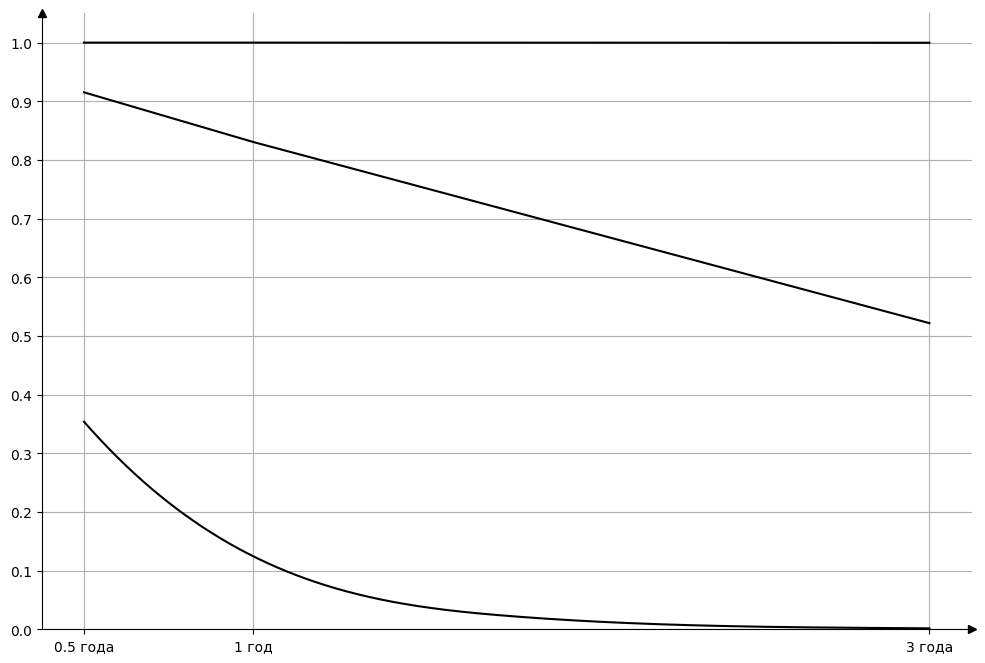

In [18]:
T = [T05, T1, T3]
p = [p05, p1, p3]
minp = [minp05, minp1, minp3]
maxp = [maxp05, maxp1, maxp3]

fg, ax = plt.subplots(figsize=(12, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False)
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False)

# ax.axvline(x=T[0], color='gray', linestyle='dashed', linewidth=1.25)
# ax.axvline(x=T[1], color='gray', linestyle='dashed', linewidth=1.25)
# ax.axvline(x=T[2], color='gray', linestyle='dashed', linewidth=1.25)

plt.xticks(ticks=T, labels=['0.5 года', '1 год', '3 года'])
plt.yticks(ticks=np.arange(0,1.1,0.1))

plt.ylim(bottom=0, top=1.05)

mis = scin.make_interp_spline(tt, pp, k=3)
xsmooth = np.linspace(min(tt), max(tt), 1000)
ysmooth = mis(xsmooth)
ax.plot(xsmooth, ysmooth, color='black')

# ysmoothed = gaussian_filter1d(p, sigma=0.8)
# plt.plot(T, ysmoothed)
# plt.show()

# plt.plot(T,p)
# plt.plot(tt,pp)
plt.plot(T,minp, color='black')
plt.plot(T,maxp, color='black')

plt.grid()
plt.show()

fg.savefig('c:\prob.png')